In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用sklearn便于预测（机器学习）
from sklearn import linear_model
#使用patsy便于生成模型
import patsy

# 9.6 Lab: Support Vector Machines

**9.6.1 Support Vector Classifier**

> set.seed(1)

> x=matrix(rnorm(20*2), ncol=2)

> y=c(rep(-1,10), rep(1,10))

> x[y==1,]=x[y==1,] + 1

> plot(x, col=(3-y))

In [3]:
from matplotlib.colors import ListedColormap
color_list =  ['red','blue','green','black','yellow','brown','peru']
cmap = ListedColormap(color_list[:2])

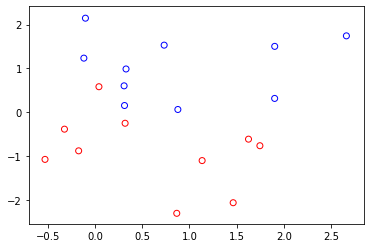

In [4]:
np.random.seed(1)
X = np.random.normal(0,1,(20,2)) 
#y =  np.r_[-np.ones(10),np.ones(10)]
y = np.repeat([-1,1], 10)
X[y == 1] = X[y == 1] + 1
for idx, cls in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cls, 0], y=X[y == cls, 1], marker = 'o',color = '',edgecolors = cmap(idx))
plt.show()

> dat=data.frame(x=x, y=as.factor(y))

> library(e1071)

> svmfit=svm(y∼., data=dat , kernel="linear", cost=10,
scale=FALSE)

> plot(svmfit , dat)

In [5]:
#参考https://github.com/JWarmenhoven/ISLR-python以及https://github.com/hyunblee/ISLR-with-Python，做了一些改进，以更贴近R语言的输出图形格式
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap
def plot_svc(svc, X, y, h=0.02, pad=0.25,figsize = (8,6)):
    color_list = ['red','blue','green','black','yellow','brown','peru']
    cmap = ListedColormap(color_list[:len(np.unique(y))])
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    levels = MaxNLocator(nbins=len(svc.classes_)).tick_values(Z.min(), Z.max())
    plt.figure(figsize = figsize)
    cs = plt.contourf(xx, yy, Z,alpha=0.25, cmap=cmap,levels = levels)
    cb = plt.colorbar(cs)
    cb.set_ticks(svc.classes_)
    #plt.scatter(X[:,0], X[:,1], s=120, edgecolors = element_to_color(y), marker = 'o',color = '')
    for idx, cls in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cls, 0], y=X[y == cls, 1], s=120,
                    marker = 'o',color = '',edgecolors = cmap(idx))
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c = 'k', marker='x', s=50, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('$X_1$')
    plt.ylabel('$X_1$')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

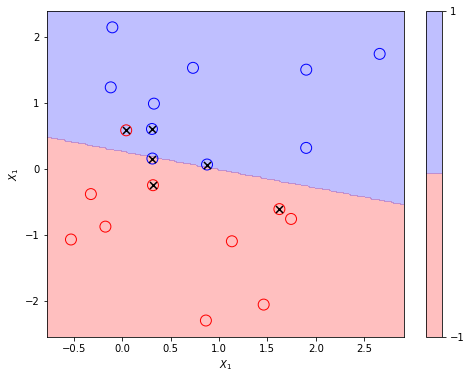

Number of support vectors:  6


In [6]:
from sklearn.svm import SVC
svm = SVC(kernel="linear", C = 10)
svm.fit(X,y)
plot_svc(svm, X, y)

> svmfit$index

In [7]:
svm.support_

array([ 0,  4,  9, 13, 15, 16])

> summary(svmfit)

In [8]:
svm.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [9]:
svm.classes_

array([-1,  1])

> svmfit=svm(y∼., data=dat , kernel="linear", cost=0.1,
scale=FALSE)

> plot(svmfit , dat)

> svmfit$index

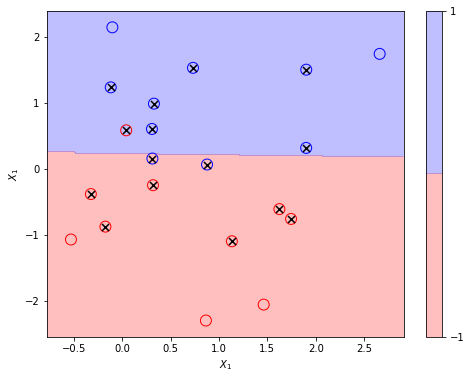

Number of support vectors:  15


In [10]:
svm = SVC(kernel="linear", C = 0.1)
svm.fit(X,y)
plot_svc(svm, X, y)

In [11]:
svm.support_

array([ 0,  3,  4,  6,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18])

> set.seed(1)

> tune.out=tune(svm,y∼.,data=dat ,kernel="linear",
ranges=list(cost=c(0.001, 0.01, 0.1, 1,5,10,100) ))

> summary(tune.out)

In [12]:
from sklearn.model_selection import GridSearchCV
np.random.seed(1)
param_range = [0.001, 0.01, 0.1, 1,5,10,100]
svm = SVC(kernel="linear")
param_grid = [
{'C': param_range },
]
grid_search = GridSearchCV(svm , param_grid, cv = 10, scoring='accuracy',return_train_score=True)
grid_search.fit(X ,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [13]:
grid_search.best_params_

{'C': 0.001}

In [14]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.95 {'C': 0.001}
0.95 {'C': 0.01}
0.85 {'C': 0.1}
0.9 {'C': 1}
0.9 {'C': 5}
0.9 {'C': 10}
0.9 {'C': 100}


> bestmod=tune.out$best .model

> summary(bestmod)

In [15]:
grid_search.best_estimator_

SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
grid_search.classes_

array([-1,  1])

> xtest=matrix(rnorm(20*2), ncol=2)

> ytest=sample(c(-1,1), 20, rep=TRUE)

> xtest[ytest==1,]= xtest[ytest==1,] + 1

> testdat=data.frame(x=xtest , y=as.factor(ytest))

In [17]:
X_test = np.random.normal(0,1,(20,2)) 
y_test = np.repeat([-1,1], 10)
X_test[y == 1] = X_test[y == 1] + 1

> ypred=predict(bestmod ,testdat)

> table(predict=ypred , truth=testdat$y)

In [18]:
from sklearn.metrics import confusion_matrix
y_pred = grid_search.predict(X_test)
#python生成的是[['TN','FP']['FN','TP']],与R互倒
svm_pred_table = pd.DataFrame(confusion_matrix(y_test, y_pred).T,
                             index = grid_search.classes_,
                             columns = [['Data.test','Data.test'],grid_search.classes_])
svm_pred_table.columns.names = ['','svc.pred']
svm_pred_table       

Data.test   
svc.pred        -1  1
-1               7  1
 1               3  9

> svmfit=svm(y∼., data=dat , kernel="linear", cost=.01,
scale=FALSE)

> ypred=predict(svmfit ,testdat)

> table(predict=ypred , truth=testdat$y )

In [19]:
svm = SVC(kernel="linear", C = 1)
svm.fit(X,y)
y_pred = svm.predict(X_test)
#python生成的是[['TN','FP']['FN','TP']],与R互倒
svm_pred_table = pd.DataFrame(confusion_matrix(y_test, y_pred).T,
                             index = grid_search.classes_,
                             columns = [['Data.test','Data.test'],grid_search.classes_])
svm_pred_table.columns.names = ['','svc.pred']
svm_pred_table       

Data.test   
svc.pred        -1  1
-1               7  1
 1               3  9

> x[y==1,]=x[y==1,]+0.5

> plot(x, col=(y+5)/2, pch=19)

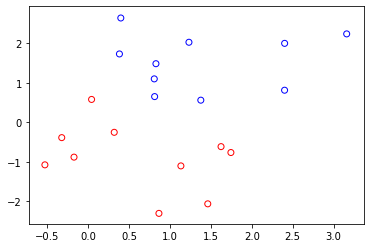

In [20]:
X[y == 1] = X[y == 1] + 0.5
for idx, cls in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cls, 0], y=X[y == cls, 1], marker = 'o',color = '',edgecolors = cmap(idx))
plt.show()

> dat=data.frame(x=x,y=as.factor(y))

> svmfit=svm(y∼., data=dat , kernel="linear", cost=1e5)

> summary(svmfit)

In [21]:
svm = SVC(kernel="linear", C = 100000)
svm.fit(X,y)

SVC(C=100000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
svm.classes_

array([-1,  1])

In [23]:
svm.support_

array([ 0,  9, 16])

> plot(svmfit , dat)

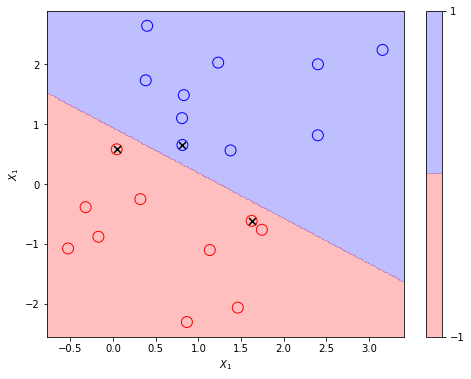

Number of support vectors:  3


In [24]:
plot_svc(svm, X, y)

> svmfit=svm(y∼., data=dat , kernel="linear", cost=1)

> summary(svmfit)

> plot(svmfit ,dat)

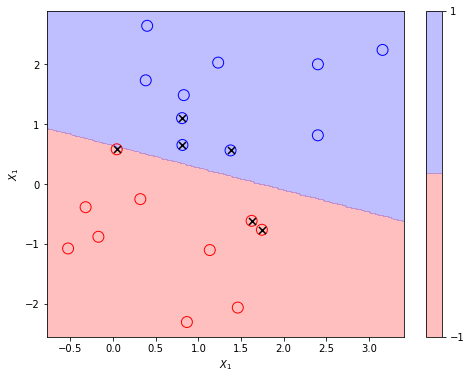

Number of support vectors:  6


In [25]:
svm = SVC(kernel="linear", C = 1)
svm.fit(X,y)
plot_svc(svm, X, y)

**9.6.2 Support Vector Machine**

> set.seed(1)

> x=matrix(rnorm(200*2) , ncol=2)

> x[1:100,]=x[1:100,]+2

> x[101:150 ,]=x[101:150,]-2

> y=c(rep(1,150) ,rep(2,50))

> dat=data.frame(x=x,y=as.factor(y))

> plot(x, col=y)

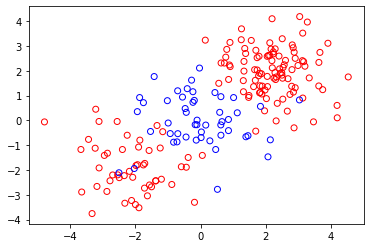

In [26]:
np.random.seed(1)
X = np.random.normal(0,1,(200,2)) 
X[0:100] = X[0:100] + 2
X[100:150] = X[100:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])
#y =  np.r_[-np.ones(150),np.ones(50) * 2] 会出现 not binary错误
for idx, cls in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cls, 0], y=X[y == cls, 1], marker = 'o',color = '',edgecolors = cmap(idx))
plt.show()

> train=sample (200,100)

> svmfit=svm(y∼., data=dat[train ,], kernel="radial", gamma=1, cost=1)

> plot(svmfit , dat[train ,])

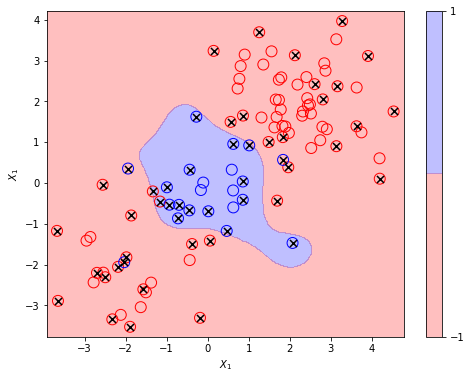

Number of support vectors:  51


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.5, random_state=2012)
y_train, y_test = train_test_split(y, test_size=0.5, random_state=2012)
svm = SVC(kernel="rbf", C = 1, gamma=1)
svm.fit(X_train,y_train)
plot_svc(svm, X_train, y_train)

> summary(svmfit)

In [28]:
svm.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 1,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [29]:
svm.support_

array([ 1,  4,  5, 10, 13, 14, 15, 16, 18, 19, 20, 22, 26, 27, 34, 40, 43,
       45, 46, 49, 54, 57, 60, 63, 64, 65, 68, 72, 77, 78, 79, 80, 81, 87,
        2,  8,  9, 21, 38, 39, 42, 47, 50, 51, 52, 56, 83, 89, 93, 98, 99])

In [30]:
svm.classes_

array([-1,  1])

> svmfit=svm(y∼., data=dat[train ,], kernel="radial",gamma=1,
cost=1e5)

> plot(svmfit ,dat[train ,])

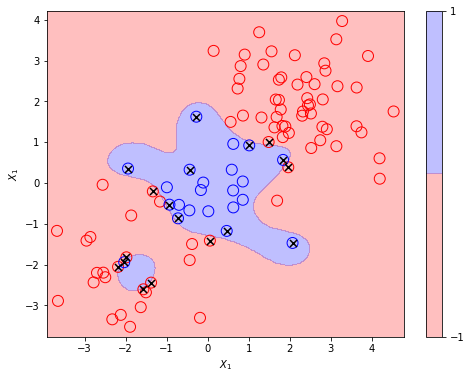

Number of support vectors:  18


In [31]:
svm = SVC(kernel="rbf", C = 1 * 10**5, gamma=1)
svm.fit(X_train,y_train)
plot_svc(svm, X_train, y_train)

> set.seed(1)

> tune.out=tune(svm, y∼., data=dat[train ,], kernel="radial",
ranges=list(cost=c(0.1,1,10,100,1000),
gamma=c(0.5,1,2,3,4) ))

> summary(tune.out)

In [32]:
np.random.seed(1)
c_range = [0.1,1,10,100,1000]
gamma_range = [0.5,1,2,3,4]
svm = SVC(kernel="rbf")
param_grid = [
{'C': c_range,
'gamma':gamma_range},
]
grid_search = GridSearchCV(svm , param_grid, cv = 10, scoring='accuracy',return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [0.5, 1, 2, 3, 4]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [33]:
grid_search.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.78 {'C': 0.1, 'gamma': 0.5}
0.78 {'C': 0.1, 'gamma': 1}
0.78 {'C': 0.1, 'gamma': 2}
0.78 {'C': 0.1, 'gamma': 3}
0.78 {'C': 0.1, 'gamma': 4}
0.8800000000000001 {'C': 1, 'gamma': 0.5}
0.8800000000000001 {'C': 1, 'gamma': 1}
0.8900000000000002 {'C': 1, 'gamma': 2}
0.8900000000000002 {'C': 1, 'gamma': 3}
0.8900000000000002 {'C': 1, 'gamma': 4}
0.9000000000000001 {'C': 10, 'gamma': 0.5}
0.8800000000000001 {'C': 10, 'gamma': 1}
0.89 {'C': 10, 'gamma': 2}
0.8699999999999999 {'C': 10, 'gamma': 3}
0.8799999999999999 {'C': 10, 'gamma': 4}
0.9100000000000001 {'C': 100, 'gamma': 0.5}
0.8699999999999999 {'C': 100, 'gamma': 1}
0.8699999999999999 {'C': 100, 'gamma': 2}
0.8799999999999999 {'C': 100, 'gamma': 3}
0.8799999999999999 {'C': 100, 'gamma': 4}
0.8799999999999999 {'C': 1000, 'gamma': 0.5}
0.8699999999999999 {'C': 1000, 'gamma': 1}
0.8699999999999999 {'C': 1000, 'gamma': 2}
0.8799999999999999 {'C': 1000, 'gamma': 3}
0.8799999999999999 {'C': 1000, 'gamma': 4}


> table(true=dat[-train ,"y"], pred=predict(tune.out$best .model ,
newdata=dat[-train ,]))

In [35]:
y_pred = grid_search.predict(X_test)
#python生成的是[['TN','FP']['FN','TP']],与R互倒
svm_pred_table = pd.DataFrame(confusion_matrix(y_test, y_pred).T,
                             index = grid_search.classes_,
                             columns = [['Data.test','Data.test'],grid_search.classes_])
svm_pred_table.columns.names = ['','svc.pred']
svm_pred_table

Data.test    
svc.pred        -1   1
-1              71   6
 1               1  22

**9.6.3 ROC Curves**

In [36]:
svm_opt = SVC(C=1, kernel='rbf', gamma=2)
svm_opt.fit(X_train, y_train)
y_train_opt_scores = svm_opt.decision_function(X_train)
y_test_opt_scores = svm_opt.decision_function(X_test)

In [37]:
svm_flex = SVC(C=1, kernel='rbf', gamma=50)
svm_flex.fit(X_train, y_train)
y_train_flex_scores = svm_flex.decision_function(X_train)
y_test_flex_scores = svm_flex.decision_function(X_test)

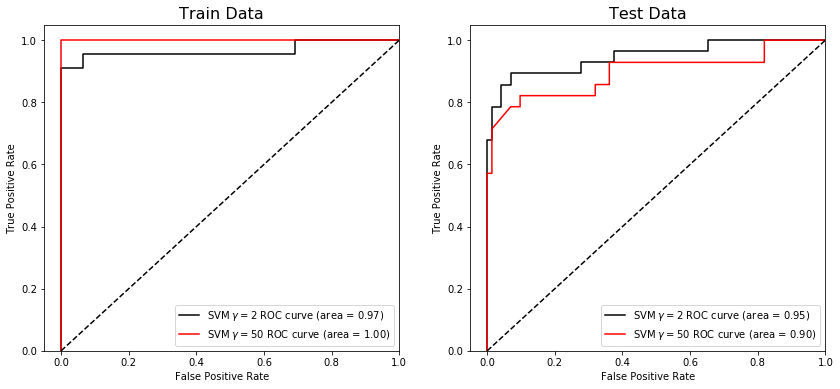

In [38]:
from sklearn.metrics import roc_curve,roc_auc_score
plt.figure(figsize=(14, 6))
plt.subplot(121)
fpr_train_opt, tpr_train_opt, thresholds_train = roc_curve(y_train, y_train_opt_scores)
fpr_train_flex, tpr_train_flex, thresholds_train = roc_curve(y_train, y_train_flex_scores)
roc_auc_train_opt = roc_auc_score(y_train, y_train_opt_scores)
roc_auc_train_flex = roc_auc_score(y_train, y_train_flex_scores)
plt.plot(fpr_train_opt, tpr_train_opt,'k-', label='SVM $\gamma = 2$ ROC curve (area = %0.2f)' % roc_auc_train_opt)
plt.plot(fpr_train_flex, tpr_train_flex,'r-', label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc_train_flex)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('Train Data', fontsize = 16)
plt.subplot(122)
fpr_test_opt, tpr_test_opt, thresholds_test = roc_curve(y_test, y_test_opt_scores)
fpr_test_flex, tpr_test_flex, thresholds_test = roc_curve(y_test, y_test_flex_scores)
roc_auc_test_opt = roc_auc_score(y_test, y_test_opt_scores)
roc_auc_test_flex = roc_auc_score(y_test, y_test_flex_scores)
plt.plot(fpr_test_opt, tpr_test_opt,'k-', label='SVM $\gamma = 2$ ROC curve (area = %0.2f)' % roc_auc_test_opt)
plt.plot(fpr_test_flex, tpr_test_flex,'r-', label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc_test_flex)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('Test Data', fontsize = 16)
plt.show()

**9.6.4 SVM with Multiple Classes**

> set.seed(1)

> x=rbind(x, matrix(rnorm(50*2), ncol=2))

> y=c(y, rep(0,50))

> x[y==0,2]= x[y==0,2]+2

> dat=data.frame(x=x, y=as.factor(y))

> par(mfrow=c(1,1))

> plot(x,col=(y+1))

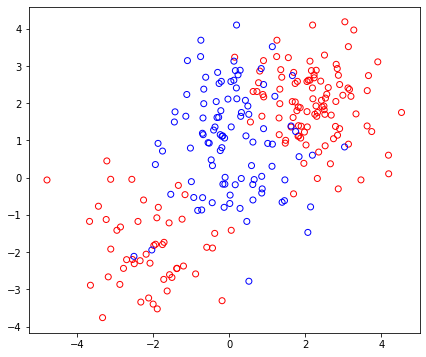

In [39]:
np.random.seed(1)
X = np.r_[X, np.random.normal(0,1,(50,2))]
y = np.r_[y, np.zeros(50)]
X[y == 0,1] =  X[y == 0,1] + 2
plt.figure(figsize=(7, 6))
for idx, cls in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cls, 0], y=X[y == cls, 1], marker = 'o',color = '',edgecolors = cmap(idx))
plt.show()

> svmfit=svm(y∼., data=dat , kernel="radial", cost=10, gamma=1)

> plot(svmfit , dat)

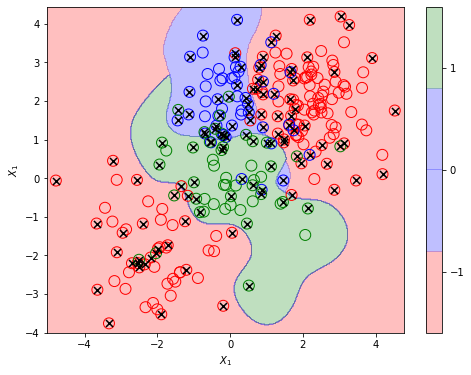

Number of support vectors:  122


In [40]:
svm = SVC(C=10, kernel='rbf', gamma=1)
svm.fit(X,y)
plot_svc(svm, X, y)

**9.6.5 基因表达数据的应用**

In [41]:
svm.classes_

array([-1.,  0.,  1.])

> library(ISLR)

> names(Khan)

In [42]:
X_train = pd.read_csv('data/Khan_xtrain.csv').drop('Unnamed: 0', axis=1)
y_train = pd.read_csv('data/Khan_ytrain.csv').drop('Unnamed: 0', axis=1).values.ravel()
X_test = pd.read_csv('data/Khan_xtest.csv').drop('Unnamed: 0', axis=1)
y_test = pd.read_csv('data/Khan_ytest.csv').drop('Unnamed: 0', axis=1).values.ravel()

> dim(Khan$xtrain )

In [43]:
X_train.shape

(63, 2308)

> dim(Khan$xtest )

In [44]:
X_test.shape

(20, 2308)

> length(Khan$ytrain )

In [45]:
len(y_train)

63

> length(Khan$ytest )

In [46]:
len(y_test)

20

> table(Khan$ytrain )

In [47]:
pd.Series(y_train).value_counts(sort=False)

1     8
2    23
3    12
4    20
dtype: int64

> table(Khan$ytest )

In [48]:
pd.Series(y_test).value_counts(sort=False)

1    3
2    6
3    6
4    5
dtype: int64

> dat=data.frame(x=Khan$xtrain , y=as.factor(Khan$ytrain ))

> out=svm(y∼., data=dat , kernel="linear",cost=10)

> summary(out)

In [49]:
svm_out = SVC(C = 10,kernel="linear")
svm_out.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
svm_out.n_support_

array([ 7, 18,  9, 20])

In [51]:
svm_out.support_.size

54

In [52]:
y_pred = svm_out.predict(X_train)
#python生成的是[['TN','FP']['FN','TP']],与R互倒
svm_pred_table = pd.DataFrame(confusion_matrix(y_train, y_pred).T,
                             index = svm_out.classes_,
                             columns = [['Data.test','Data.test','Data.test','Data.test'],svm_out.classes_])
svm_pred_table.columns.names = ['','svc.pred']
svm_pred_table

Data.test            
svc.pred         1   2   3   4
1                8   0   0   0
2                0  23   0   0
3                0   0  12   0
4                0   0   0  20

> dat.te=data.frame(x=Khan$xtest , y=as.factor(Khan$ytest ))

> pred.te=predict(out, newdata=dat.te)

> table(pred.te, dat.te$y)

In [53]:
y_pred = svm_out.predict(X_test)
#python生成的是[['TN','FP']['FN','TP']],与R互倒
svm_pred_table = pd.DataFrame(confusion_matrix(y_test, y_pred).T,
                             index = svm_out.classes_,
                             columns = [['Data.test','Data.test','Data.test','Data.test'],svm_out.classes_])
svm_pred_table.columns.names = ['','svc.pred']
svm_pred_table

Data.test         
svc.pred         1  2  3  4
1                3  0  0  0
2                0  6  2  0
3                0  0  4  0
4                0  0  0  5